<a href="https://colab.research.google.com/github/shiv03-tan/-datasciencecoursera/blob/main/correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import scipy.io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from scipy.signal import find_peaks

In [2]:
mat_file = scipy.io.loadmat(r'/content/Biosec2_raw_data.mat')
signal1 = mat_file['Data_cell']

In [3]:

new_signal1 = signal1[:9000,:]


In [4]:
s1=signal1[1,0,0]
s1=np.reshape(s1, 9240)

In [ ]:
plot

In [5]:
# Remove DC offsets
s1 = s1 - np.mean(s1)

In [6]:
for i in range(100):
    s = signal1[i, 0, 0]
    slen = len(s[0])
    s = np.reshape(s, slen)
    s = s - np.mean(s)
    signal1[i, 0, 0] = s
    
    s = s / np.max(np.abs(s))

In [7]:
print(s)

[ 0.01683373  0.02445518  0.03969806 ... -0.05175926 -0.06700215
 -0.09748793]


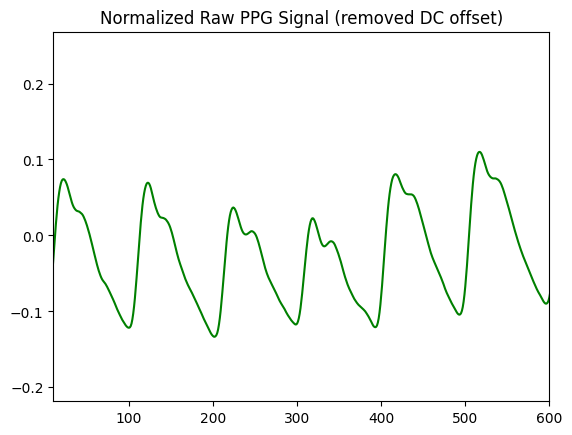

In [23]:
plt.figure(1)
plt.xlim(10,600)
plt.plot(s,'-g')
# plt.plot(s3,'-r')
plt.title('Normalized Raw PPG Signal (removed DC offset)')
plt.show() 

In [9]:
#Apply a low-pass filter to remove high-frequency noise from the signal.
# Remove high-frequency noise
cutoff_freq = 0.5 # Cutoff frequency in Hz
sampling_rate = 100 # Sampling rate is the number of samples per second
nyquist_freq = 0.5 * sampling_rate
normal_cutoff = cutoff_freq / nyquist_freq
b, a = butter(1, normal_cutoff, btype='low', analog=False)
filtered_signal1 = lfilter(b, a, s )

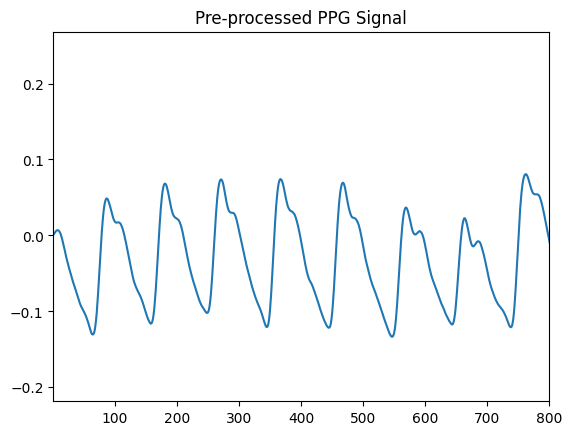

In [10]:
# Plot the pre-processed signal
plt.figure(2)
plt.xlim(1,800)
plt.plot(filtered_signal1)
plt.title('Pre-processed PPG Signal')
plt.show()


In [11]:
print(filtered_signal1)

[0.00026036 0.00089089 0.00185554 ... 0.11665142 0.11120629 0.10522234]


In [12]:
# Find peaks and dips
peaks, _ = find_peaks(filtered_signal1, distance= 20)
peaks = peaks[3:] # Only include peaks from the 4th peak onwards
s=filtered_signal1[peaks[0]:]


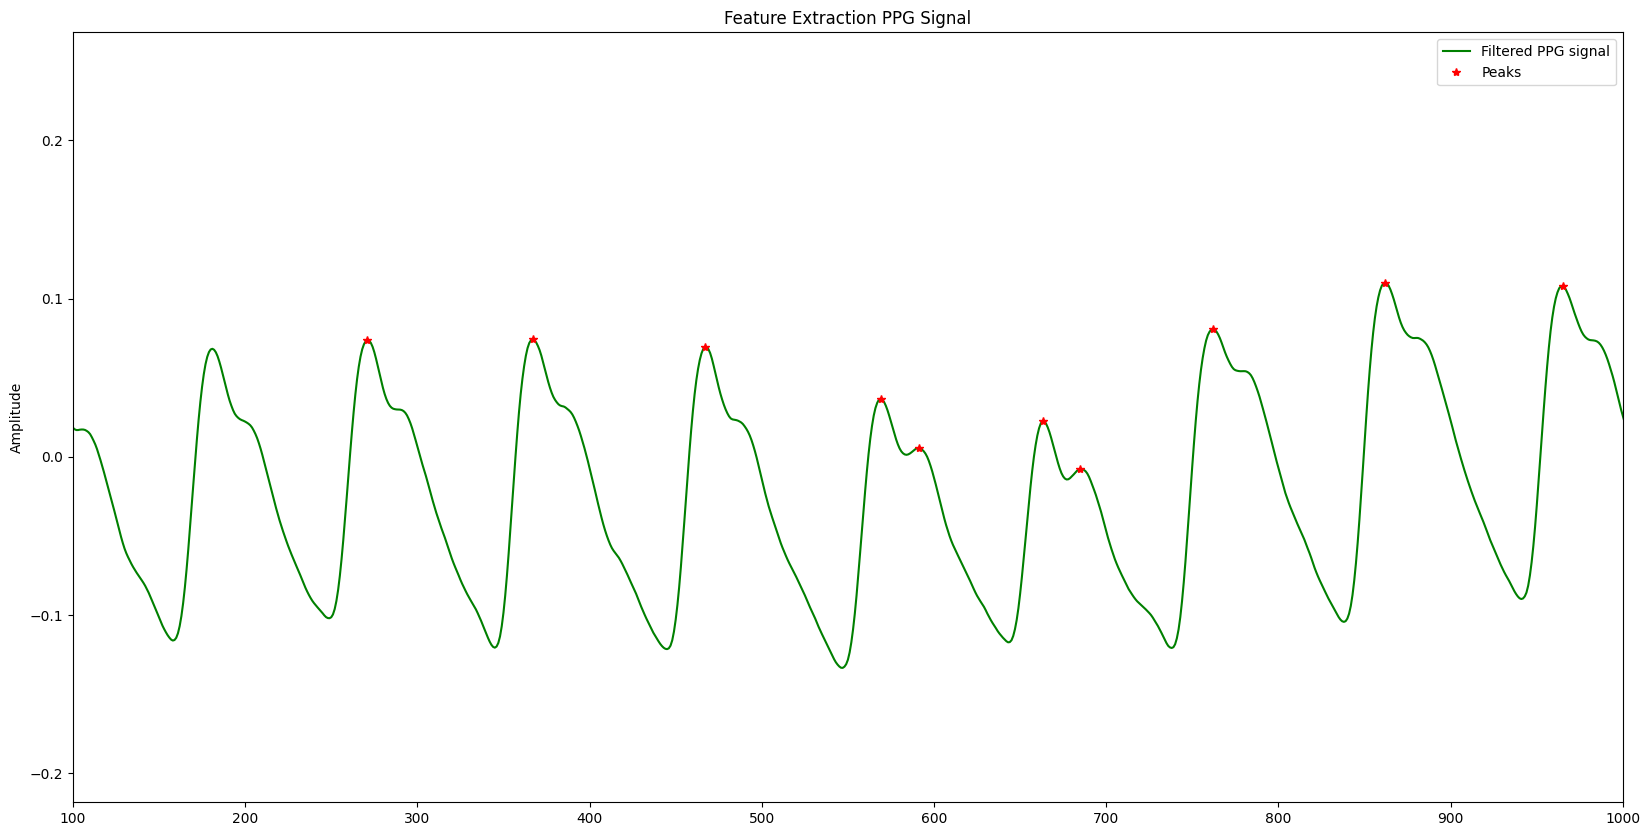

In [25]:
# Plot the signal and the detected peaks and dips
fig, ax = plt.subplots(figsize=(20,10))
plt.xlim(100,1000)
ax.plot(filtered_signal1 , 'g', label='Filtered PPG signal')
ax.plot(peaks, filtered_signal1[peaks], 'r*', label='Peaks')
ax.set_ylabel('Amplitude')
plt.title('Feature Extraction PPG Signal')
ax.legend()
plt.show()

In [14]:
print(filtered_signal1[peaks])

[ 0.07372062  0.07414296  0.06937749  0.0368183   0.00564322  0.02259104
 -0.00765993  0.08071065  0.11005252  0.10797493  0.05626327  0.01517574
  0.04528674  0.06857682  0.06983714  0.04083438 -0.00187058  0.07755547
  0.04336287 -0.00547863  0.0658418   0.07012186  0.038873   -0.00103903
  0.01286683 -0.03285955  0.09894194  0.14952135  0.04749993 -0.00854506
  0.09098694  0.07025483  0.13574398  0.14591161  0.12372727 -0.02448264
  0.07500001  0.05866969  0.13400196  0.13532094  0.12076408  0.10780997
  0.15848451  0.17439257  0.16300572  0.1233035   0.07668352  0.11176531
  0.13835416  0.13581883  0.11808992  0.07222796  0.018783    0.09451566
  0.15033632  0.15791264  0.13103108  0.10333261  0.03398332  0.14762928
  0.1635579   0.14698891  0.09650218  0.02668491  0.13204543  0.06222983
  0.16603984  0.16282833  0.13973898  0.08597818  0.01251605  0.13561079
  0.15519603  0.13690406  0.10486309  0.02713206  0.0727413  -0.0021736
  0.12964272  0.13785114  0.13516046  0.12653233  0.

In [15]:
dips, _ = find_peaks(-filtered_signal1, distance= 25)
systolic_peaks, _ = find_peaks(filtered_signal1, distance=20 )
diastolic_peaks, _ = find_peaks(-filtered_signal1, distance=15)
systolic_foots, _ = find_peaks(-filtered_signal1, distance= 10)
diastolic_foots, _ = find_peaks(filtered_signal1, distance= 15)
s=filtered_signal1[dips[4]:]

In [16]:
print(dips)

[  64  103  158  249  345  445  547  584  643  677  738  778  838  879
  941 1047 1083 1144 1180 1243 1347 1447 1484 1538 1610 1645 1726 1766
 1829 1923 1958 1994 2029 2097 2191 2232 2266 2297 2364 2402 2454 2540
 2631 2710 2803 2840 2896 2987 3078 3118 3166 3201 3251 3342 3436 3531
 3569 3622 3713 3808 3903 3996 4032 4083 4121 4171 4262 4354 4392 4440
 4478 4526 4614 4705 4795 4830 4880 4919 4968 5058 5151 5240 5276 5324
 5413 5504 5598 5637 5692 5727 5784 5884 5987 6088 6127 6186 6222 6279
 6377 6477 6575 6611 6647 6679 6760 6865 6965 7002 7058 7095 7129 7164
 7248 7353 7451 7487 7543 7638 7736 7832 7869 7923 8017 8114 8210 8248
 8299 8336 8386 8477 8569 8655 8692 8739 8811 8844 8912 9004 9042 9086
 9122 9162 9194 9250 9339]


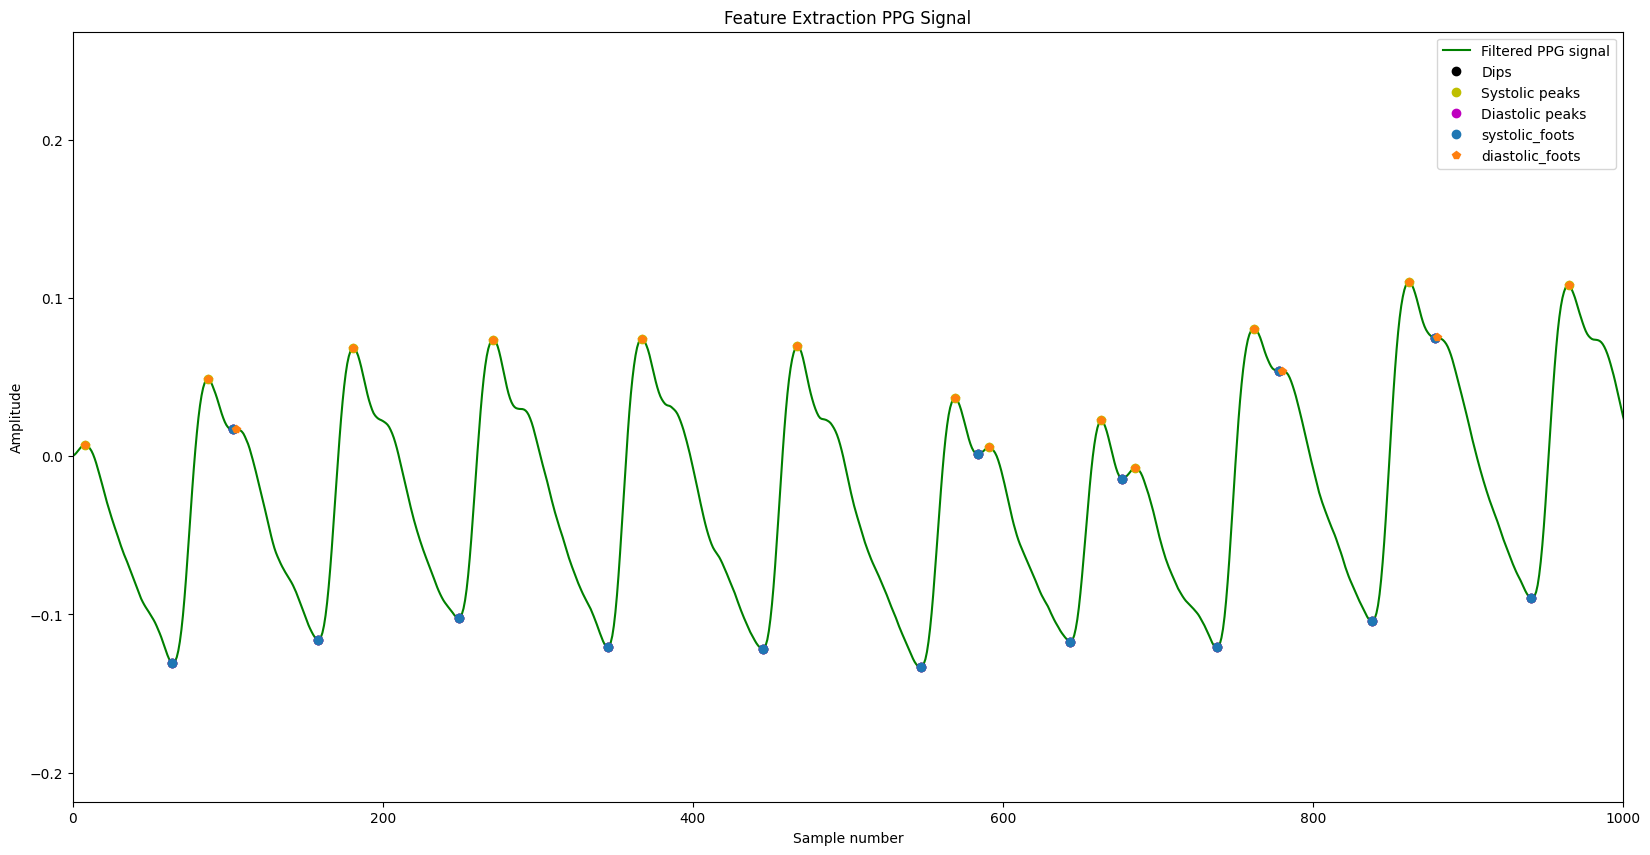

In [26]:
# Plot the signal and the detected peaks and dips
fig, ax = plt.subplots(figsize=(20,10))
plt.xlim(0,1000)
#ax.plot(s, 'b', label='Raw PPG signal')
ax.plot(filtered_signal1 , 'g', label='Filtered PPG signal')
#ax.plot(peaks, filtered_signal[peaks], 'r*', label='Peaks')
ax.plot(dips, filtered_signal1[dips], 'ko', label='Dips')
ax.plot(systolic_peaks, filtered_signal1[systolic_peaks], 'yo', label='Systolic peaks')
ax.plot(diastolic_peaks, filtered_signal1[diastolic_peaks], 'mo', label='Diastolic peaks')
ax.plot(systolic_foots, filtered_signal1[systolic_foots], 'o', label='systolic_foots')
ax.plot(diastolic_foots, filtered_signal1[diastolic_foots], 'p', label='diastolic_foots')
ax.set_xlabel('Sample number')
ax.set_ylabel('Amplitude')
plt.title('Feature Extraction PPG Signal')
ax.legend()
plt.show()

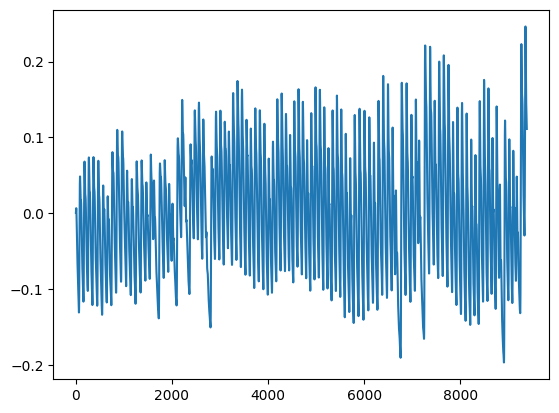

In [27]:
a = filtered_signal1[1:-1]
v = filtered_signal1[2:-1]
plt.plot(a)


In [28]:
ppg_list = []
for i in range(1,5):
    #s2 = filtered_signal1[i:-1]
    #s = len(s2)
    #s2 = np.reshape(s2,s)
    #s = s - np.mean(s)
    #filtered_signal1[i] = s
    
    #s = s / np.max(np.abs(s))
    ncc_series = NormaliseCrossCorrelation(a, v)
    ppg_list.append(ncc_series)

print(ppg_list)

NameError: ignored

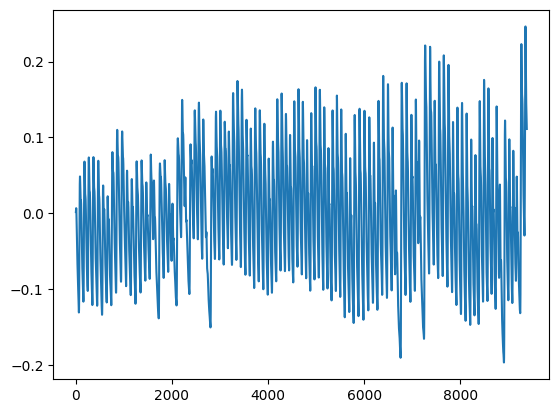

In [29]:
plt.plot(v)

In [30]:
def NormaliseCrossCorrelation(a,v):
    M = len(a)
    N = len(v)

    if type(a) is list: 
        a = np.array(a)
    if type(v) is list: 
        v = np.array(v)
    
    v_mu = np.mean(v)

    ncc_series = []
    for i in range(M-N+1):
        _a = a[i:i+N]
        a_sum = _a - np.mean(_a)
        v_sum = v - v_mu
        
        nr = 1/N * np.sum(a_sum*v_sum) / np.sqrt(np.var(_a)*np.var(v))
        ncc_series.append(nr)

    return sum(ncc_series)/len(ncc_series)


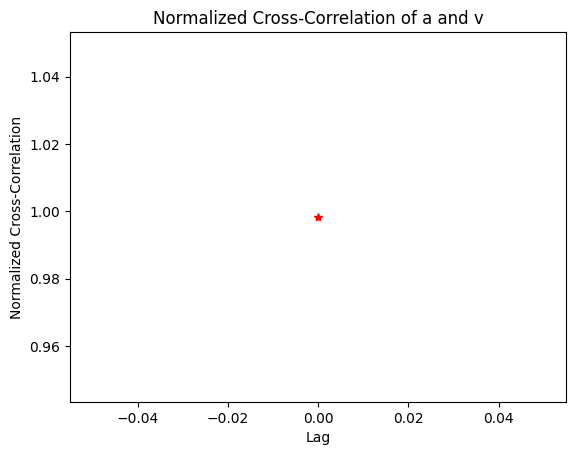

In [31]:
# Example usage
#a = np.random.rand(100)
#v = np.random.rand(10)

ncc_series = NormaliseCrossCorrelation(a, v)

plt.plot(ncc_series, '*r')
plt.xlabel('Lag')
plt.ylabel('Normalized Cross-Correlation')
plt.title('Normalized Cross-Correlation of a and v')
plt.show()

In [ ]:
a = [1 for i in range(1, filtered_signal)]


In [32]:
def NormaliseCrossCorrelation(a, v):
    M = len(a)
    if isinstance(v, np.ndarray):
        N = v.shape[0]
    elif isinstance(v, np.float64):
        N = 1
    else:
        raise TypeError('v must be a numpy array or scalar')
        
    if isinstance(a, list):
        a = np.array(a)
        

In [33]:
ppg_list = []
for i in range(a):
    #s2 = filtered_signal1[i:-1]
    #s = len(s2)
    #s2 = np.reshape(s2,s)
    #s = s - np.mean(s)
    #filtered_signal1[i] = s
    
    #s = s / np.max(np.abs(s))
    ncc_series = NormaliseCrossCorrelation(a,v)
    ncc_series.append(ppg_list)

print(ppg_list)


TypeError: ignored

In [ ]:
subject_list = [filtered_signal1[1,0,0],filtered_signal1[2,0,0] ]

# Iterate over the subjects and compute the cross-correlation for each subject
for filtered_signal1 in subject_list:
    ncc_series = NormaliseCrossCorrelation(filtered_signal1[1,0,0], filtered_signal1[2,0,0])
    print(ncc_series)

In [34]:
import numpy as np
a = filtered_signal1[i:-1]
v = filtered_signal1[1:-1]
# List of PPG signals
ppg_list = [a, v]

# Number of signals
n_signals = len(ppg_list)

# Initialize correlation matrix
corr_matrix = np.zeros((n_signals, n_signals))

# Compute cross-correlation for each pair of signals
for i in range(n_signals):
    for j in range(n_signals):
        if i == j:
            corr_matrix[i, j] = 1.0
        else:
            corr = np.correlate(ppg_list[i], ppg_list[j], mode='full')
            corr_matrix[i, j] = np.max(np.abs(corr))

print(corr_matrix)
print(len(a))
print(len(v))

[[ 1.         60.33398072]
 [60.33398072  1.        ]]
9388
9388
